<a href="https://colab.research.google.com/github/ashikshafi08/Learning-Fastai/blob/main/Comp/See_in_the_dark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
!nvidia-smi

Tue Jul 13 14:19:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
long_exp = '/content/drive/MyDrive/dark_data/png_format/Sony/long'
short_exp = '/content/drive/MyDrive/dark_data/png_format/Sony/short'

In [7]:
import random 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

im_p = long_exp +'/' +  random.choice(os.listdir(long_exp))

In [8]:
def plot_images(long = True):
  from matplotlib.pyplot import figure
  rows, columns = 2 , 2
  for i in range(1, 5):
    if long == True: 
      full_path = long_exp +'/' +  random.choice(os.listdir(long_exp))
      img = mpimg.imread(full_path)
      figure(figsize=(10, 6))
      plt.subplot(rows , columns , i)
      plt.imshow(img)
      plt.axis(False)
    else:
      full_path = short_exp +'/' +  random.choice(os.listdir(short_exp))
      img = mpimg.imread(full_path)
      figure(figsize=(10, 6))
      plt.subplot(rows , columns , i)
      plt.axis(False)
      plt.imshow(img)

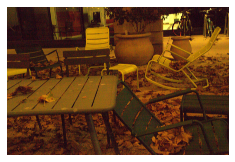

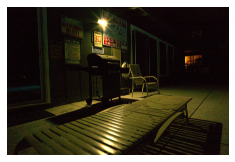

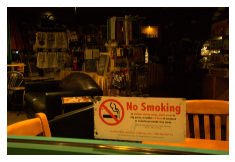

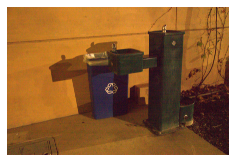

In [9]:
plot_images(long = False)

In [10]:
!pip install fastai -q --upgrade

     |████████████████████████████████| 194kB 8.1MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 


In [11]:
import pandas as pd 
col_names = ['short_exp' , 'long_exp' , 'ISO' , 'aperture']
# dum = pd.read_csv('/content/drive/MyDrive/dark_data/Sony_train_list.txt' , sep=' ' , names= col_names)
# dum

In [12]:
def apply_transf(jpg_path,filename):
  p = Path(filename)
  part = p.parts
  tot_pat = f'{jpg_path}/{part[-2]}/{part[-1][:-4]}.jpg'
  return tot_pat

def rearrange_df(df,jpg_path = '/content/drive/MyDrive/png_format',mode = ['short_exp','long_exp']):
  """
  rearranges the dataframe (.ARW to .PNG arrangement)
  """
  cp = df
  for m in mode:
    cp[m] = cp[m].apply(lambda x :apply_transf(jpg_path,x))
  return cp

In [13]:
import os 
os.listdir('/content/drive/MyDrive/dark_data/png_format/Sony/short/')[:10] ,os.listdir('/content/drive/MyDrive/dark_data/png_format/Sony/long/')[:10] 

(['00154_02_0.1s.jpg',
  '00154_03_0.1s.jpg',
  '00154_04_0.1s.jpg',
  '00154_05_0.1s.jpg',
  '00154_06_0.1s.jpg',
  '00154_07_0.1s.jpg',
  '00154_08_0.1s.jpg',
  '00154_09_0.1s.jpg',
  '00155_00_0.1s.jpg',
  '00155_01_0.1s.jpg'],
 ['.ipynb_checkpoints',
  '00090_00_30s.jpg',
  '00091_00_30s.jpg',
  '00092_00_30s.jpg',
  '10093_00_30s.jpg',
  '00072_00_30s.jpg',
  '00073_00_30s.jpg',
  '10074_00_30s.jpg',
  '00075_00_30s.jpg',
  '00076_00_30s.jpg'])

In [14]:
def preprocess_dataframe(txt_path , add_path):
  '''
  Pass a txt_path and this function does the following things: 
  1. Load in the txt file as a dataframe and add the right column names
  2. Remove the dots trailing with each element in a row
  5. Add a full path 
  '''
  # Column names
  col_names = ['short_exp' , 'long_exp' , 'ISO' , 'aperture']

  # Loading the txt and renaming the columns 
  df = pd.read_csv(txt_path , sep = ' ' , names = col_names)

  # Remove the trailing dots and adding full directory path 
  for col in df.columns[:2]:
    df[col] = df[col].apply(lambda x: x[:-3]) + 'jpg'
    df[col] = df[col].apply(lambda x: x[1:])
    df[col] = add_path + df[col].astype(str)

  return df 

In [29]:
import pandas as pd
train_df = preprocess_dataframe(txt_path = '/content/drive/MyDrive/dark_data/Sony_train_list.txt',add_path='/content/drive/MyDrive/dark_data/png_format')
val_df = preprocess_dataframe(txt_path = '/content/drive/MyDrive/dark_data/Sony_val_list.txt',add_path='/content/drive/MyDrive/dark_data/png_format')
test_df = preprocess_dataframe(txt_path = '/content/drive/MyDrive/dark_data/Sony_test_list.txt',add_path='/content/drive/MyDrive/dark_data/png_format')

# Shape of the dataset 
train_df.shape , val_df.shape , test_df.shape

((1865, 4), (234, 4), (598, 4))

In [30]:
train_df.head()

,short_exp,long_exp,ISO,aperture
0,/content/drive/MyDrive/dark_data/png_format/Sony/short/00001_00_0.04s.jpg,/content/drive/MyDrive/dark_data/png_format/Sony/long/00001_00_10s.jpg,ISO200,F8
1,/content/drive/MyDrive/dark_data/png_format/Sony/short/00001_00_0.1s.jpg,/content/drive/MyDrive/dark_data/png_format/Sony/long/00001_00_10s.jpg,ISO200,F8
2,/content/drive/MyDrive/dark_data/png_format/Sony/short/00001_01_0.04s.jpg,/content/drive/MyDrive/dark_data/png_format/Sony/long/00001_00_10s.jpg,ISO200,F8
3,/content/drive/MyDrive/dark_data/png_format/Sony/short/00001_01_0.1s.jpg,/content/drive/MyDrive/dark_data/png_format/Sony/long/00001_00_10s.jpg,ISO200,F8
4,/content/drive/MyDrive/dark_data/png_format/Sony/short/00001_02_0.1s.jpg,/content/drive/MyDrive/dark_data/png_format/Sony/long/00001_00_10s.jpg,ISO200,F8


In [31]:
train_df.short_exp[:10]

0    /content/drive/MyDrive/dark_data/png_format/Sony/short/00001_00_0.04s.jpg
1     /content/drive/MyDrive/dark_data/png_format/Sony/short/00001_00_0.1s.jpg
2    /content/drive/MyDrive/dark_data/png_format/Sony/short/00001_01_0.04s.jpg
3     /content/drive/MyDrive/dark_data/png_format/Sony/short/00001_01_0.1s.jpg
4     /content/drive/MyDrive/dark_data/png_format/Sony/short/00001_02_0.1s.jpg
5     /content/drive/MyDrive/dark_data/png_format/Sony/short/00001_03_0.1s.jpg
6     /content/drive/MyDrive/dark_data/png_format/Sony/short/00001_04_0.1s.jpg
7     /content/drive/MyDrive/dark_data/png_format/Sony/short/00001_05_0.1s.jpg
8     /content/drive/MyDrive/dark_data/png_format/Sony/short/00001_06_0.1s.jpg
9     /content/drive/MyDrive/dark_data/png_format/Sony/short/00001_07_0.1s.jpg
Name: short_exp, dtype: object

In [32]:
val_df['is_valid'] = True 
train_df['is_valid'] = False
#test_df['is_valid'] = True 

In [33]:
train_data = pd.concat([train_df , val_df] , ignore_index = True)
train_data.head()

,short_exp,long_exp,ISO,aperture,is_valid
0,/content/drive/MyDrive/dark_data/png_format/Sony/short/00001_00_0.04s.jpg,/content/drive/MyDrive/dark_data/png_format/Sony/long/00001_00_10s.jpg,ISO200,F8,False
1,/content/drive/MyDrive/dark_data/png_format/Sony/short/00001_00_0.1s.jpg,/content/drive/MyDrive/dark_data/png_format/Sony/long/00001_00_10s.jpg,ISO200,F8,False
2,/content/drive/MyDrive/dark_data/png_format/Sony/short/00001_01_0.04s.jpg,/content/drive/MyDrive/dark_data/png_format/Sony/long/00001_00_10s.jpg,ISO200,F8,False
3,/content/drive/MyDrive/dark_data/png_format/Sony/short/00001_01_0.1s.jpg,/content/drive/MyDrive/dark_data/png_format/Sony/long/00001_00_10s.jpg,ISO200,F8,False
4,/content/drive/MyDrive/dark_data/png_format/Sony/short/00001_02_0.1s.jpg,/content/drive/MyDrive/dark_data/png_format/Sony/long/00001_00_10s.jpg,ISO200,F8,False


In [34]:
df = pd.concat([test_df , train_data] , ignore_index= True)
df.head()

,short_exp,long_exp,ISO,aperture,is_valid
0,/content/drive/MyDrive/dark_data/png_format/Sony/short/10003_00_0.04s.jpg,/content/drive/MyDrive/dark_data/png_format/Sony/long/10003_00_10s.jpg,ISO200,F9,NaN
1,/content/drive/MyDrive/dark_data/png_format/Sony/short/10003_00_0.1s.jpg,/content/drive/MyDrive/dark_data/png_format/Sony/long/10003_00_10s.jpg,ISO200,F9,NaN
2,/content/drive/MyDrive/dark_data/png_format/Sony/short/10003_01_0.04s.jpg,/content/drive/MyDrive/dark_data/png_format/Sony/long/10003_00_10s.jpg,ISO200,F9,NaN
3,/content/drive/MyDrive/dark_data/png_format/Sony/short/10003_01_0.1s.jpg,/content/drive/MyDrive/dark_data/png_format/Sony/long/10003_00_10s.jpg,ISO200,F9,NaN
4,/content/drive/MyDrive/dark_data/png_format/Sony/short/10003_02_0.04s.jpg,/content/drive/MyDrive/dark_data/png_format/Sony/long/10003_00_10s.jpg,ISO200,F9,NaN


In [35]:
from fastai.vision.all import * 
from fastai import * 
data_path = '/content/drive/MyDrive/dark_data/png_format/'

In [36]:

def get_dls(bs:int, size:int , path):
  "Generates two `GAN` DataLoaders"
  dblock = DataBlock(blocks=(ImageBlock, ImageBlock),
                     get_x = ColReader('short_exp'),
                   get_y = ColReader('long_exp'), 
                   splitter=ColSplitter(col = 'is_valid'),
                   item_tfms=Resize(size),
                   batch_tfms=[*aug_transforms(max_zoom=2. , min_scale= 0.3 , size = 224 , batch= True , min_zoom= 0.8),
                               Normalize.from_stats(*imagenet_stats)])
  dls = dblock.dataloaders(path , bs=bs)
  dls.c = 3 # For 3 channel image
  return dls

In [38]:
dls = get_dls(16 , 460, train_data)

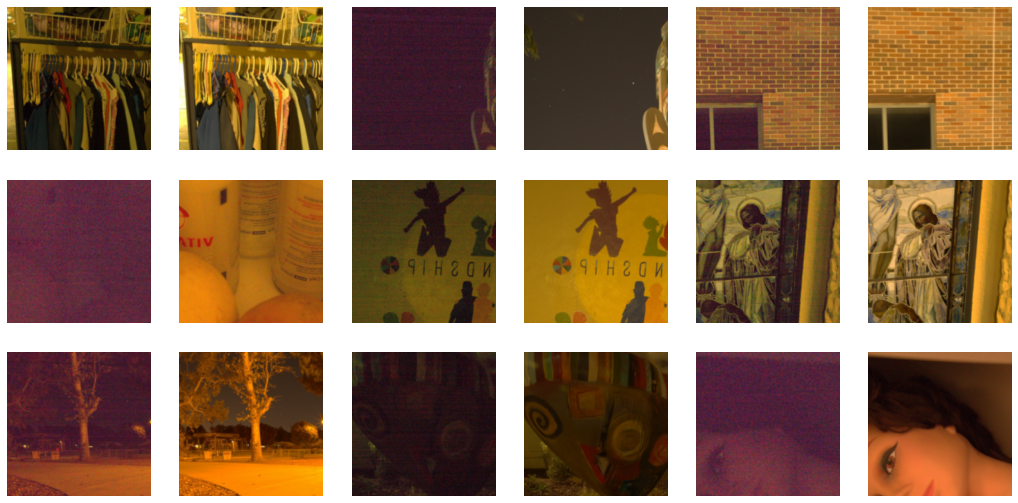

In [39]:
dls.show_batch()

In [40]:
wd , y_range , loss_gen = 1e-3 , (-3 , 3) , MSELossFlat()
bbone = resnet18


In [41]:
dls.c = 3
from fastai.callback import fp16

In [42]:
def create_gen_learner():
  return unet_learner(blur= True , norm_type= NormType.Weight , self_attention= True , y_range = y_range , 
                      dls = dls , arch = bbone , loss_func = loss_gen , n_out = dls.c).to_fp16()
  
learn_gen = create_gen_learner()

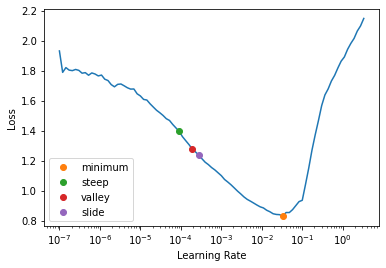

In [43]:
lrs = learn_gen.lr_find(suggest_funcs=(minimum , steep , valley , slide))

In [24]:

learn_gen.fit_one_cycle(3, pct_start=0.8, wd=wd)


epoch,train_loss,valid_loss,time
0,0.770741,0.473598,17:04
1,0.441198,0.283188,16:00


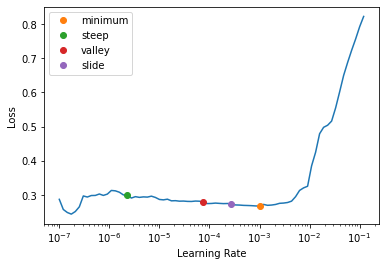

In [25]:
learn_gen.unfreeze()

lrs = learn_gen.lr_find(suggest_funcs=(minimum , steep , valley , slide))

In [1]:
learn_gen.fit_one_cycle(10 , slice(lrs.valley.item() , lrs.minimum) , wd=wd)

NameError: ignored

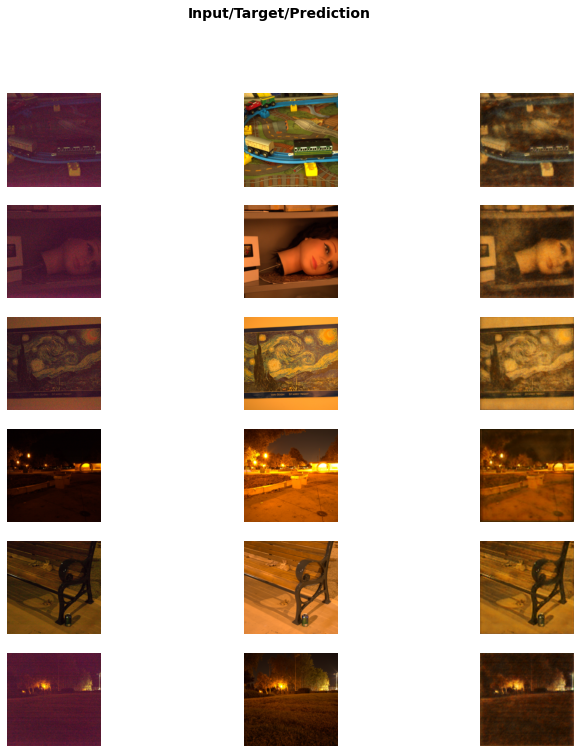

In [ ]:
learn_gen.show_results(max_n=6, figsize=(12,12))


In [ ]:
learn_gen.export(fname= 'drive/MyDrive/dark_data/png_format/models/first_model.pkl')

In [ ]:
inf = load_learner('drive/MyDrive/dark_data/png_format/models/first_model.pkl')

In [ ]:
tne = inf.predict('test.jpg')
plt.imshow(tne / 255)

TypeError: ignored

In [ ]:
plt.imshow(tne.numpy()[0])

In [ ]:
img = tne[0]
img.shape

torch.Size([3, 224, 224])

In [ ]:
img[0][None].shape

torch.Size([1, 224, 224])

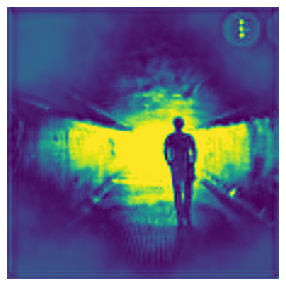

In [ ]:
img[0].show()

In [ ]:
im = plt.imread('/content/test.jpg')
im = im/255.

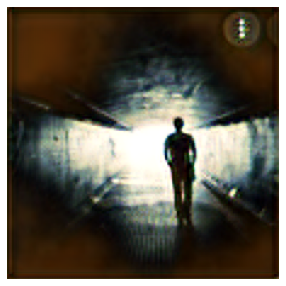

In [ ]:
learn_gen.predict('test.jpg')[0].show()

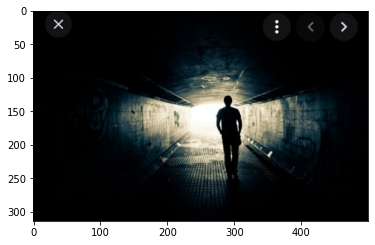

In [ ]:
plt.imshow(im)

In [14]:
from timm import create_model

ModuleNotFoundError: ignored